In [27]:
# Importer les bibliothèques
import numpy as np # Calcul numérique
import pandas as pd # Analyse et manipulation de données
import matplotlib.pyplot as plt # Visualisation des données sous forme de graphes et courbes


In [3]:
#Importer KNeighborsClassifier de scikit-learn pour appliquer la classification
from sklearn.neighbors import KNeighborsClassifier
#Importer train_test_split de scikit-learn pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
# importer la fonction load_digits du module datasets de la bibliothèque scikit-learn
from sklearn.datasets import load_digits

In [13]:
#charger le dataset digits
digits = load_digits()
X, Y = digits.data, digits.target

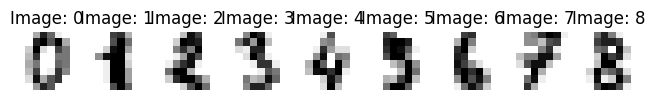

In [31]:
#Visualisation images et target
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(8,8))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Image: %i' % label)

In [14]:
# Diviser les données en ensembles d'entraînement (train) et de test, en réservant 20% des données pour le test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
#créer le modèle K-NN
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [20]:
#le taux de précision
score = KNN.score(X_test, Y_test)
print('Score: %f' %score)

Score: 0.977778


In [42]:
#test k de 1 à 20
neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, Y_train)
  train_accuracy[i] = knn.score(X_train, Y_train)
  test_accuracy[i] = knn.score(X_test, Y_test)
print(test_accuracy)


[0.98888889 0.98888889 0.99166667 0.98888889 0.98055556 0.97777778
 0.98333333 0.98055556 0.98333333 0.98055556 0.97777778 0.975
 0.98055556 0.97777778 0.97777778 0.97222222 0.96944444 0.96666667
 0.96388889 0.96111111]


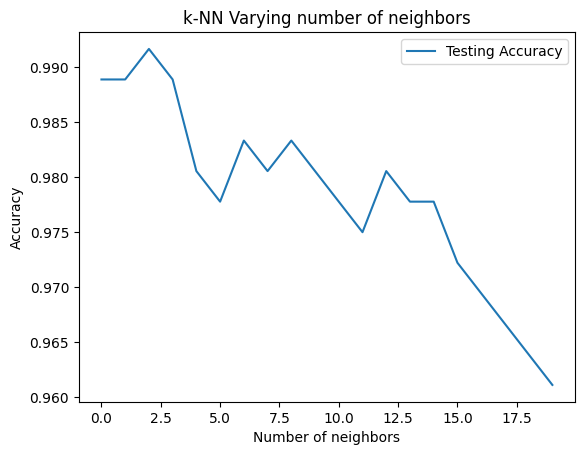

In [32]:
#visualization taux de précision(test)
plt.title('k-NN Varying number of neighbors')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

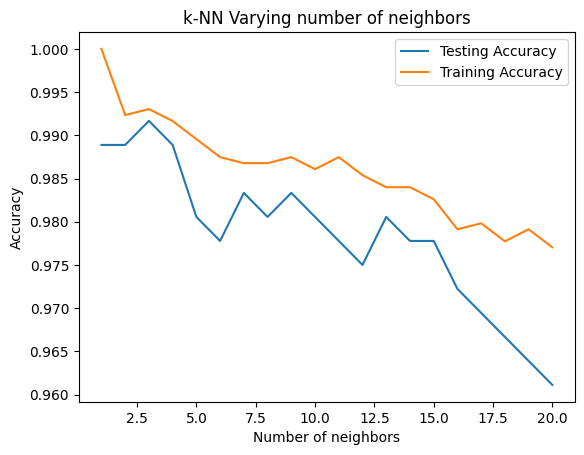

In [33]:
#visualization taux de précision(test) et taux de test
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [35]:
#calculer du y predict
y_pred = KNN.predict(X_test)

In [36]:
#matrice de confusion
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  2  1  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  1  1  0  0  0  0  0 34  0]
 [ 0  0  0  2  0  0  0  0  1 36]]


In [37]:
#créer le modèle K-NN
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
#le taux de précision
score = KNN.score(X_test, Y_test)
print('Score: %f' %score)


Score: 0.991667
